In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

In [2]:
# import df
dist = pd.read_csv("Data\Test_Clusters_Distincts.txt", sep=" ", header=None)
atyp = pd.read_csv("Data\Test_Clusters_Atypiques.txt", sep=" ", header=None)
mel = pd.read_csv("Data\Test_Clusters_Melanges.txt", sep=" ", header=None)
rand = pd.read_csv("Data\Test_Clusters_Random.txt", sep=" ", header=None)
dist.head()

,0,1,2,3,4,5
0,0.112213,0.614523,-0.120554,-0.076287,0.844718,0.376434
1,-0.404110,-0.042121,0.574591,-0.204818,0.360084,1.398744
2,-0.018190,0.263355,0.429380,0.755978,0.301715,0.449145
3,1.693847,1.382552,0.834288,1.245551,1.641393,1.114700
4,0.721389,-0.407652,0.573885,0.201700,0.742344,2.211372


In [3]:
dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   float64
 3   3       1500 non-null   float64
 4   4       1500 non-null   float64
 5   5       1500 non-null   float64
dtypes: float64(6)
memory usage: 70.4 KB


In [4]:
dist.describe()

,0,1,2,3,4,5
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.055006,0.037114,0.012320,-0.016385,0.061087,-0.017080
std,4.215985,4.226133,4.261288,4.208880,4.230119,4.238538
min,-9.067191,-8.261702,-9.913322,-6.940022,-7.624580,-9.320554
25%,-4.103527,-4.303691,-3.990622,-4.503966,-4.309602,-4.077629
50%,0.000336,0.064934,-0.003255,-0.029511,0.116623,0.035015
75%,4.386273,4.105716,4.246051,3.953395,4.300144,4.523125
max,8.699785,10.618425,7.910289,9.004210,7.798013,6.924676


<AxesSubplot:>

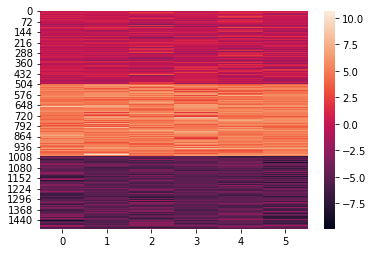

In [5]:
sns.heatmap(dist)

<AxesSubplot:>

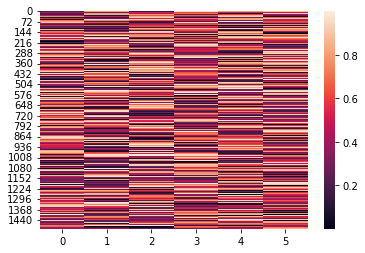

In [6]:
sns.heatmap(rand)

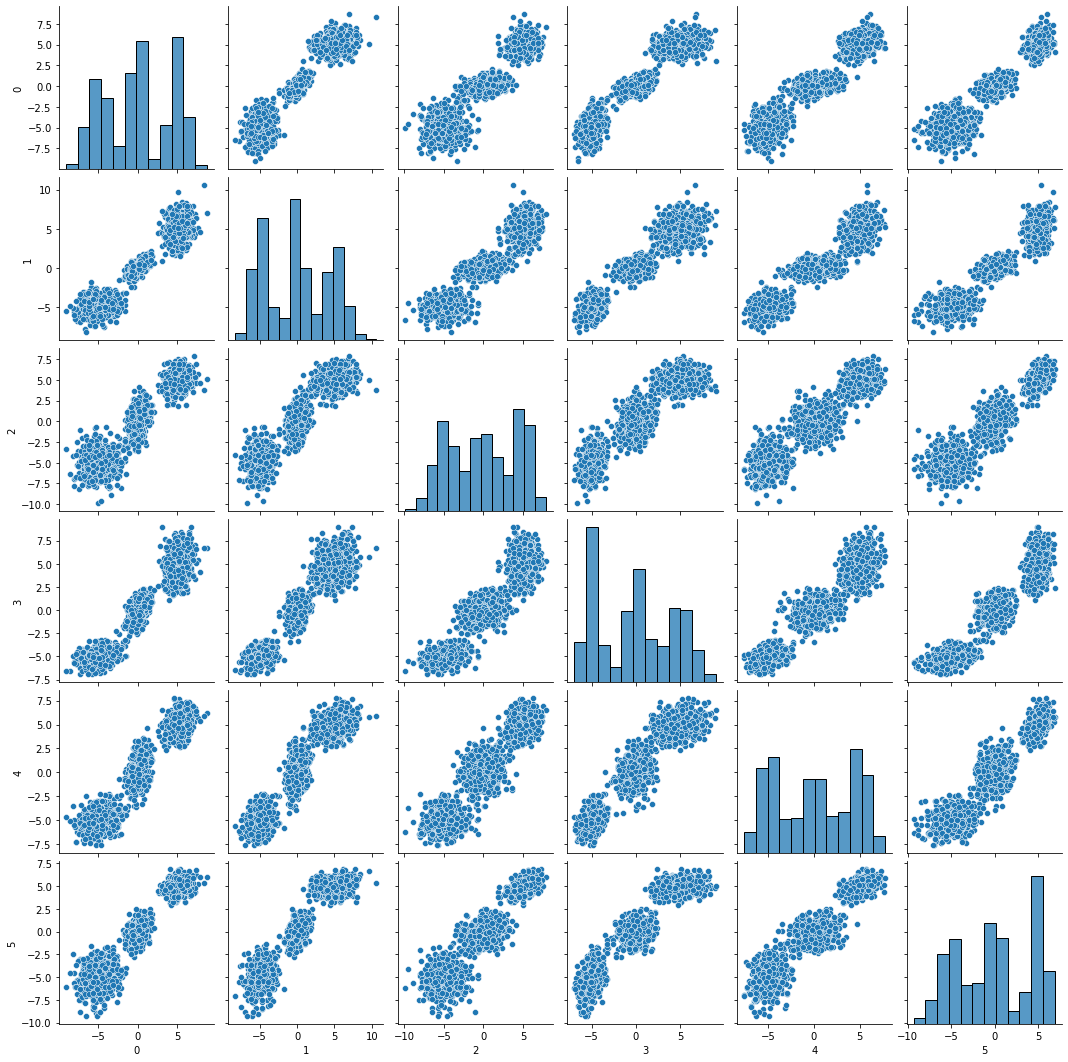

In [7]:
# graph des clusterings 2 à 2
graph2a2 = sns.pairplot(dist)
graph2a2

(1500, 6)


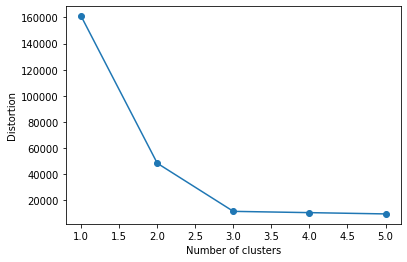

In [8]:
# creation of an to find the optimal number of clusters on dist
X = dist.values
print(X.shape)
distortions = []
for i in range(1, 6):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 6), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

(1500, 6)


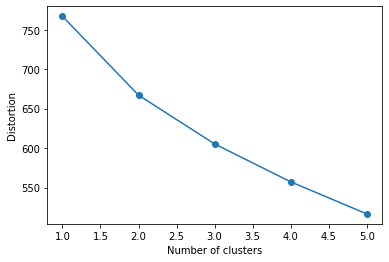

In [9]:
# creation of an elbowplot to find the optimal number of clusters on dist
X = rand.values
print(X.shape)
distortions = []
for i in range(1, 6):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0) # kmeans vient du package sklearn
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 6), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

c:\Program Files (x86)\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


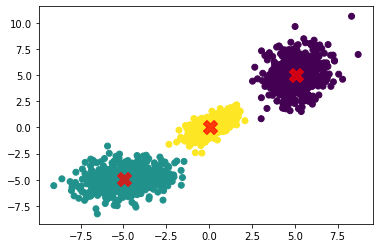

In [10]:
# kmeans sur dist
kmeans_dist = KMeans(n_clusters=3, random_state=0).fit(dist)
plt.scatter(dist[0], dist[1], c=kmeans_dist.labels_)
# affichages des centres des clusters
centers = kmeans_dist.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Centers')
plt.show()

c:\Program Files (x86)\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


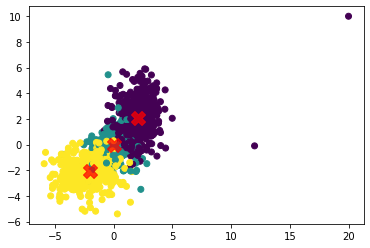

In [11]:
# kmeans sur atyp
kmeans_atyp = KMeans(n_clusters=3, random_state=0).fit(atyp)
plt.scatter(atyp[0], atyp[1], c=kmeans_atyp.labels_)
# affichages des centres des clusters
centers = kmeans_atyp.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Centers')
plt.show()

c:\Program Files (x86)\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


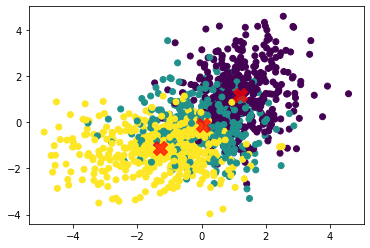

In [12]:
# kmeans sur mel
kmeans_mel = KMeans(n_clusters=3, random_state=0).fit(mel)
plt.scatter(mel[0], mel[1], c=kmeans_mel.labels_)
# affichages des centres des clusters
centers = kmeans_mel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Centers')
plt.show()

c:\Program Files (x86)\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


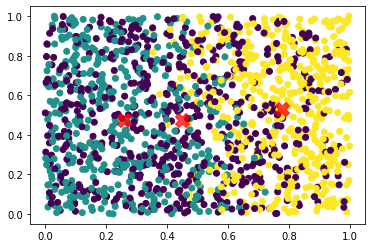

In [13]:
# kmeans sur rand
kmeans_rand = KMeans(n_clusters=3, random_state=0).fit(rand)
# graph du clustering
plt.scatter(rand[0], rand[1], c=kmeans_rand.labels_)
# affichages des centres des clusters
centers = kmeans_rand.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Centers')
plt.show()

c:\Program Files (x86)\Python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


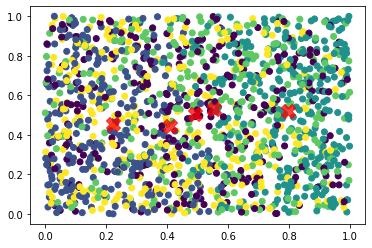

In [14]:
# kmeans sur rand
kmeans_rand = KMeans(n_clusters=5, random_state=0).fit(rand)
# graph du clustering
plt.scatter(rand[0], rand[1], c=kmeans_rand.labels_)
# affichages des centres des clusters
centers = kmeans_rand.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Centers')
plt.show()

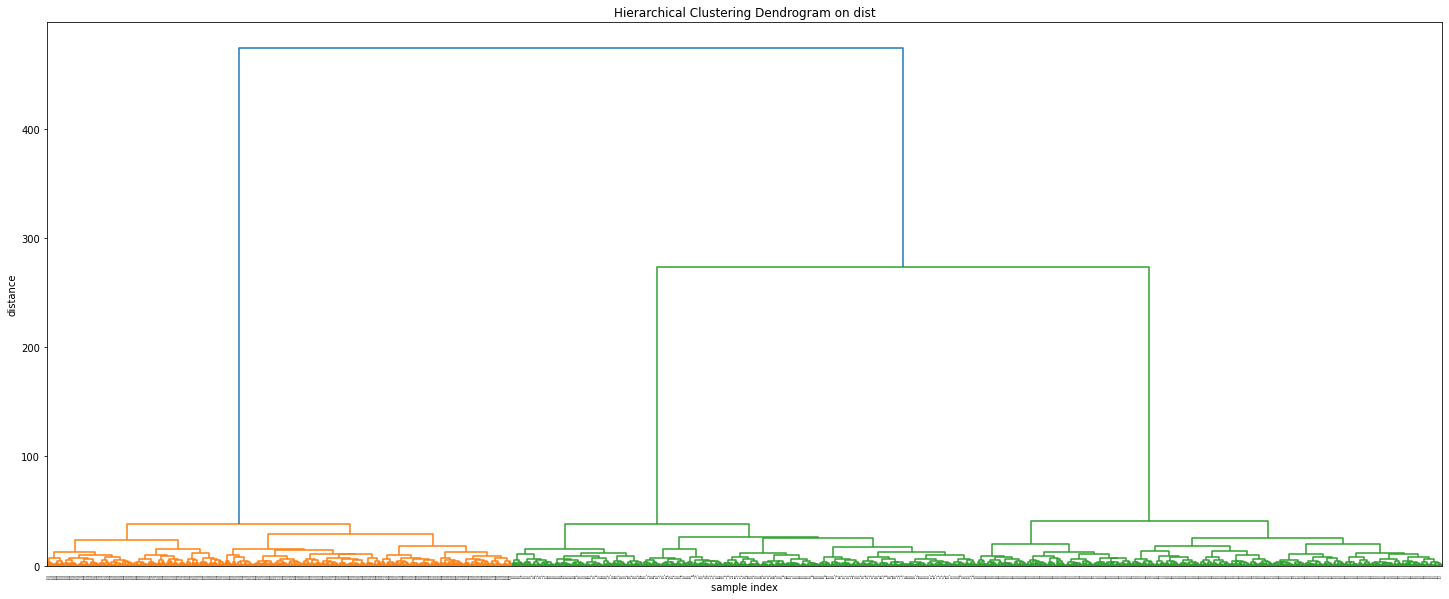

In [15]:
# dendogramme des données distinctes avec 3 clusters
Z = linkage(dist, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram on dist')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=2.)
plt.show()

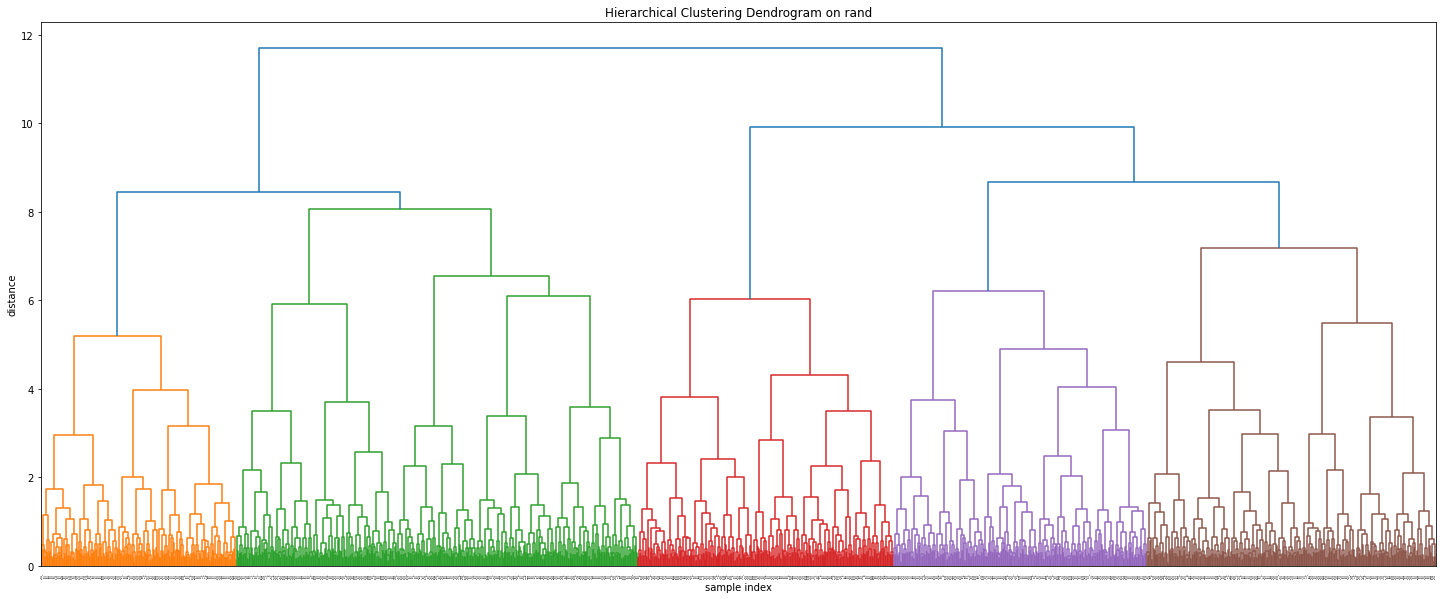

In [16]:
# dendogramme des données randoms avec 6 clusters
Z = linkage(rand, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram on rand')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=2.)
plt.show()

In [17]:
# Séléction des données pour DBSCAN
x =dist.values
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(dist)
label=model.labels_
#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 3


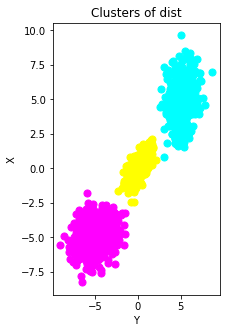

In [18]:
# clustering avec la méthode DBSCAN
y_means = db.fit_predict(dist)
plt.figure(figsize=(3,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'magenta')


plt.xlabel('Y')
plt.ylabel('X')
plt.title('Clusters of dist')
plt.show()

In [19]:
# Séléction des données pour DBSCAN
x =atyp.values
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(atyp)
label=model.labels_
#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


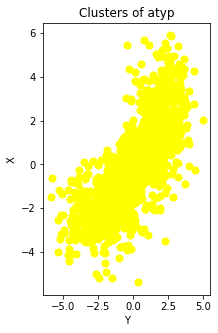

In [20]:
# clustering avec la méthode DBSCAN
y_means = db.fit_predict(atyp)
plt.figure(figsize=(3,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'magenta')


plt.xlabel('Y')
plt.ylabel('X')
plt.title('Clusters of atyp')
plt.show()

In [21]:
# Séléction des données pour DBSCAN
x =mel.values
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(mel)
label=model.labels_
#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


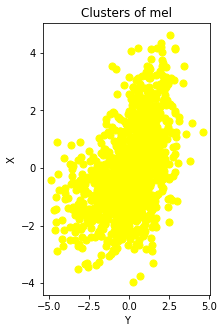

In [22]:
# clustering avec la méthode DBSCAN
y_means = db.fit_predict(mel)
plt.figure(figsize=(3,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'magenta')


plt.xlabel('Y')
plt.ylabel('X')
plt.title('Clusters of mel')
plt.show()

In [23]:
# Séléction des données pour DBSCAN
x =rand.values
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(rand)
label=model.labels_
#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


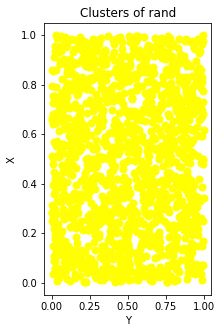

In [24]:
# clustering avec la méthode DBSCAN
y_means = db.fit_predict(rand)
plt.figure(figsize=(3,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'magenta')


plt.xlabel('Y')
plt.ylabel('X')
plt.title('Clusters of rand')
plt.show()